# Exploroatory Data Analysis

***
To explore the relationship between variables and other patterns in the dataset
* Step 1: Create missing table and plot missing data
* Step 2: Impute numeric variables and create 'SalaryGroup'
* Step 3: Impute string variables 
* Step 4: Deal with variables with high CARDINALITY
* Step 5: Convert binary data to int
* Step 6: Plot categorical data
* Step 7: Visualize relationship between variables and Pandas profiling
* Step 8: Feature Selection and Enginnering
* Step 9: Save the dataset into the folder of processed
***

In [69]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
parent_project_path = os.path.abspath(os.path.join('..'))
if parent_project_path not in sys.path:
    sys.path.append(parent_project_path)
from src.library.sb_utils import save_file
sns.set()


### Step 1: Import & check data

In [70]:
# Import dataset 
today = datetime.today().strftime('%Y_%m_%d')
fileName = '../data/interim/{0}_daily.csv'.format(today)
data = pd.read_csv(fileName)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          117 non-null    object 
 1   Company           117 non-null    object 
 2   CompanyRating     90 non-null     float64
 3   CompanyIndustry   88 non-null     object 
 4   isRemote          117 non-null    bool   
 5   City              115 non-null    object 
 6   State             117 non-null    object 
 7   Region            117 non-null    object 
 8   isSenior          117 non-null    bool   
 9   isJunior          117 non-null    bool   
 10  isMid             117 non-null    bool   
 11  SalaryMidValue    7 non-null      float64
 12  CompanyRevenue    50 non-null     object 
 13  CompanySizeGroup  88 non-null     object 
 14  isDA              117 non-null    bool   
 15  isDS              117 non-null    bool   
 16  isML              117 non-null    bool   
 1

In [72]:
data[data.duplicated()]
# By remving JotId, it may introduce duplicated records. 

,JobTitle,Company,CompanyRating,CompanyIndustry,isRemote,City,State,Region,isSenior,isJunior,isMid,SalaryMidValue,CompanyRevenue,CompanySizeGroup,isDA,isDS,isML,isAI
66,Support Engineer,Radancy,3.7,Healthcare,False,Raleigh,NC,South,False,False,False,NaN,NaN,Midsize,False,False,False,False


In [73]:
data.loc[(data.isDA==1) & (data.isDS ==1),:]

,JobTitle,Company,CompanyRating,CompanyIndustry,isRemote,City,State,Region,isSenior,isJunior,isMid,SalaryMidValue,CompanyRevenue,CompanySizeGroup,isDA,isDS,isML,isAI
12,Data Scientist – Institutional Clients Group (...,Citi,3.9,Financial Services,False,New York,NY,Northeast,True,False,False,NaN,>$10B,Extra-Large,True,True,False,False
15,"Senior Quantitative Analyst, Data Science",NATIONAL GRID CO USA (NE POWER),3.8,"Energy, Mining & Utilities",False,Waltham,MA,Northeast,True,False,False,NaN,$5B-$10B,Extra-Large,True,True,False,False
17,Global Head of Data Science & Analytics/ Data ...,Baker Hughes,4.0,Manufacturing,True,San Francisco,CA,West,True,False,False,NaN,>$10B,Extra-Large,True,True,False,False
21,"Manager, Data Science - Research & Analytics S...",Tonal,4.0,"Department, Clothing & Shoe Stores",False,San Francisco,CA,West,False,False,False,NaN,NaN,Small,True,True,False,False
23,Data Science Analytics Analyst,Accenture,4.0,Information Technology,False,Seattle,WA,West,False,False,False,NaN,>$10B,Extra-Large,True,True,False,False
34,JPMWM - Data Science Lead - Investments & Advi...,"JPMorgan Chase Bank, N.A.",3.9,Financial Services,False,Jersey City,NJ,Northeast,True,False,False,NaN,NaN,Extra-Large,True,True,False,False
46,Data Science Analyst,ACI Federal™,3.1,Government & Public Administration,False,Falls Church,VA,South,False,False,False,81910.4,NaN,Small,True,True,False,False
57,Director of Business Analytics & Data Science ...,HK Tech,NaN,NaN,True,West Des Moines,IA,Midwest,True,False,False,185000.0,NaN,NaN,True,True,False,False
73,Data Scientist Lead - Focused Analytics Soluti...,"JPMorgan Chase Bank, N.A.",3.9,Financial Services,False,Plano,TX,South,True,False,False,NaN,NaN,Extra-Large,True,True,False,False


In [74]:
def util_df():
    missing=data.isnull().sum()
    util_df = pd.DataFrame({'column_type': data.dtypes,
                                 'unique_count': data.nunique(),
                                 'unique_percent': round(data.nunique()/len(data)*100,2),
                                'missing_count': missing, 
                                 'missing_percent': round(missing*100/len(data),2)})
    return util_df
util_df()

,column_type,unique_count,unique_percent,missing_count,missing_percent
JobTitle,object,108,92.31,0,0.00
Company,object,59,50.43,0,0.00
CompanyRating,float64,15,12.82,27,23.08
CompanyIndustry,object,15,12.82,29,24.79
isRemote,bool,2,1.71,0,0.00
City,object,46,39.32,2,1.71
State,object,24,20.51,0,0.00
Region,object,4,3.42,0,0.00
isSenior,bool,2,1.71,0,0.00
isJunior,bool,2,1.71,0,0.00


In [75]:
data.loc[data.Company.isnull(),:].index

Int64Index([], dtype='int64')

In [76]:
# drop row without Company information
data.drop(data.loc[data.Company.isnull(),:].index, inplace=True)

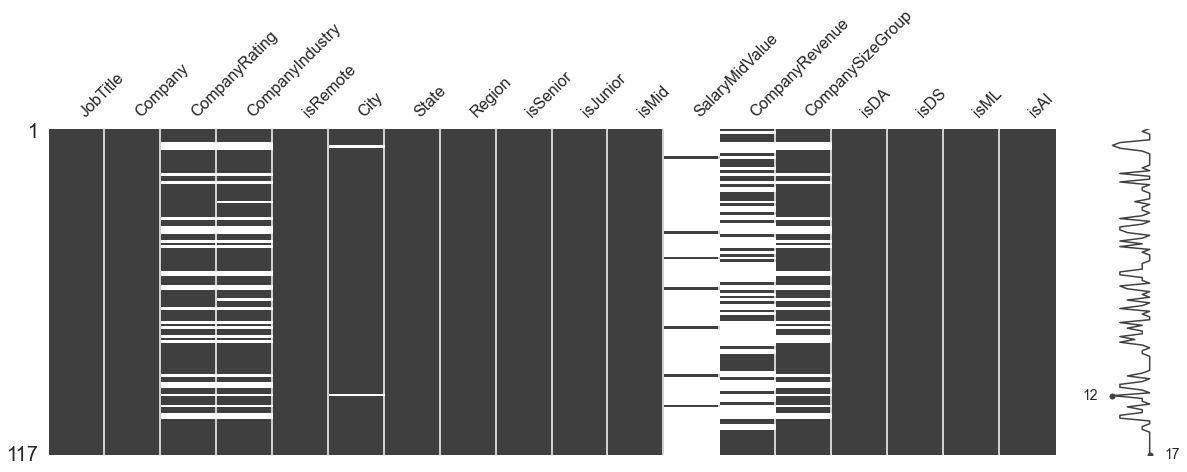

In [77]:
import missingno as mno
mno.matrix(data, figsize = (20,6))
plt.show()

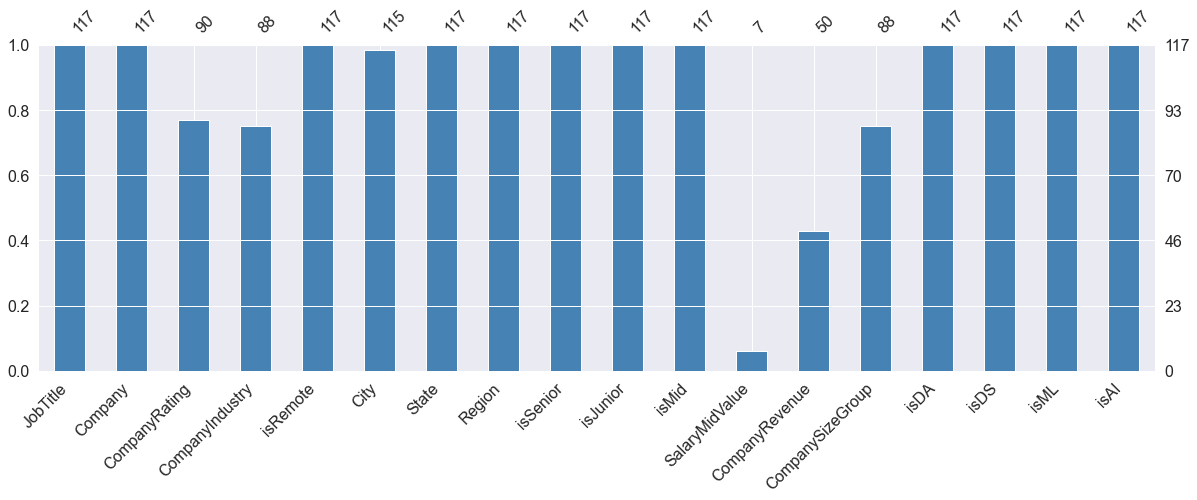

In [78]:
mno.bar(data, figsize=(20,6), color='steelblue')
plt.show()

### Step 2: Impute numeric variables & create 'SalaryGroup'

In [79]:
#Continuous variables: 
#CompanyRating (missing rate 20%), SalaryMidValue (missing rate 85%)

In [80]:
data.CompanyRating.unique()

array([3.9, 3.7, 3.5, nan, 3. , 3.4, 4. , 3.8, 3.2, 4.2, 4.3, 3.6, 4.1,
       3.1, 4.7, 4.5])

In [81]:
print(round(data.CompanyRating.mean(),1), data.CompanyRating.median())

3.8 3.9


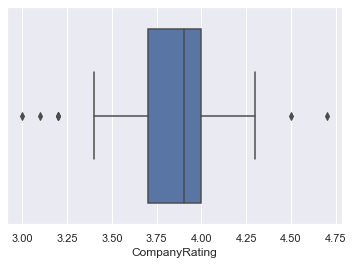

In [82]:
sns.boxplot(x='CompanyRating',data=data)
plt.show()

In [83]:
# Impute CompanyRating (missing rate 20%) using mean value
data.CompanyRating.fillna(round(data.CompanyRating.mean(),1), inplace=True)  


How to deal with features with high missing values, such as 'salarymidvalue' ??? bootstrapping to filling up the values based on 'companysize', 'companyindustry', 'region'???

with over 75% missing percentage
* option1: using mean value within certain group first, then apply general mean due to high volumn of missing count  
* option2: using imputation via chained equation, possible using regression instead of mean.

In [84]:
# Impute SalaryMidValue (missing rate 85%) using group mean value

In [85]:
data.SalaryMidValue.value_counts().head(4)

137500.0    1
69102.0     1
81910.4     1
65000.0     1
Name: SalaryMidValue, dtype: int64

In [86]:
data.SalaryMidValue.describe()

count         7.000000
mean     121506.700000
std       52868.945214
min       65000.000000
25%       75506.200000
50%      120000.000000
75%      161250.000000
max      192034.500000
Name: SalaryMidValue, dtype: float64

In [87]:
data.groupby(['Region','CompanySizeGroup','CompanyIndustry'])['SalaryMidValue'].agg(['mean'])

mean
Region    CompanySizeGroup CompanyIndustry                            
Midwest   Extra-Large      Financial Services                      NaN
                           Healthcare                              NaN
                           Information Technology                  NaN
                           Transportation & Logistics              NaN
Northeast Extra-Large      Energy, Mining & Utilities              NaN
                           Financial Services                      NaN
                           Information Technology                  NaN
                           Insurance                               NaN
                           Rail Transportation                     NaN
          Large            Information Technology                  NaN
                           Insurance                               NaN
                           Management & Consulting                 NaN
          Midsize          Healthcare                              NaN
                           Information Technology                  NaN
South     Extra-Large      Aerospace & Defense                     NaN
                           Financial Services                      NaN
                           Government & Public Administration  69102.0
                           Healthcare                              NaN
                           Information Technology                  NaN
                           Rail Transportation                     NaN
                           Telecommunications                      NaN
          Large            Transportation & Logistics              NaN
          Midsize          Healthcare                              NaN
          Small            Government & Public Administration  81910.4
West      Extra-Large      Financial Services                      NaN
                           Information Technology                  NaN
                           Manufacturing                           NaN
                           Pharmaceutical & Biotechnology          NaN
                           Rail Transportation                     NaN
          Large            Aerospace & Defense                     NaN
                           Information Technology                  NaN
          Small            Department, Clothing & Shoe Stores      NaN
                           Information Technology                  NaN

In [88]:
# Due to high volume of missing rate, need to using different level of 
# group mean 
data['SalaryMidValue_imp'] = data.SalaryMidValue


In [89]:
data.SalaryMidValue_imp.isnull().sum()

110

In [90]:
data.SalaryMidValue_imp.fillna(round(data.groupby(['Region','CompanySizeGroup','CompanyIndustry'])['SalaryMidValue_imp'].transform('mean'),1), inplace=True)

In [91]:
data.SalaryMidValue_imp.isnull().sum()

110

In [92]:
data.SalaryMidValue_imp.fillna(round(data.groupby(['Region','CompanySizeGroup',])['SalaryMidValue_imp'].transform('mean'),1), inplace=True)

In [93]:
data.SalaryMidValue_imp.isnull().sum()

93

In [94]:
data.SalaryMidValue_imp.fillna(round(data.groupby(['Region'])['SalaryMidValue_imp'].transform('mean'),1), inplace=True)

In [95]:
data.SalaryMidValue_imp.isnull().sum()

0

In [96]:
data.SalaryMidValue_imp.fillna(round(data.SalaryMidValue_imp.mean(),1), inplace=True)

In [97]:
data.SalaryMidValue_imp.isnull().sum()

0

In [98]:
data.SalaryMidValue_imp.describe()

count       117.000000
mean     127036.008547
std       43181.230823
min       65000.000000
25%       69537.300000
50%      120000.000000
75%      164767.200000
max      192034.500000
Name: SalaryMidValue_imp, dtype: float64

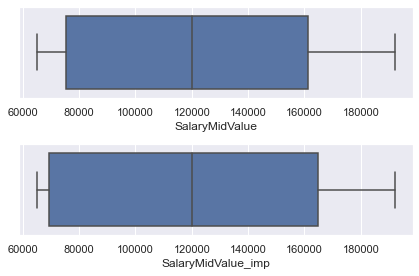

In [99]:
plt.subplot(2,1,1)
sns.boxplot(x='SalaryMidValue', data=data)
plt.subplot(2,1,2)
sns.boxplot(x='SalaryMidValue_imp', data=data)
plt.tight_layout()
plt.show()

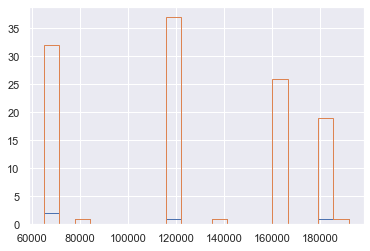

In [100]:
data.SalaryMidValue.hist(histtype='step',bins =20)
data.SalaryMidValue_imp.hist(histtype='step', bins =20)
plt.show()

In [101]:
# Considering that SalaryMidValue (missing rate 85%) 
# using regrssion imputation TBD

In [102]:
# Create SalaryGroup for SalaryMidValue variable
salaryGroupLabels = ['20K-50K','50K-75k','75k-100k','100k-125k','125k+']
salaryRanges =[20000, 50000, 75000, 100000, 125000, np.inf]
data['SalaryGroup'] = pd.cut(data.SalaryMidValue_imp, bins = salaryRanges, labels = salaryGroupLabels)
#data['SalaryGroup'] = pd.qcut(data.SalaryMidValue, q=5, labels = salaryGroupLabels)
data.SalaryGroup.value_counts(normalize=True).sort_index()

20K-50K      0.000000
50K-75k      0.273504
75k-100k     0.008547
100k-125k    0.316239
125k+        0.401709
Name: SalaryGroup, dtype: float64

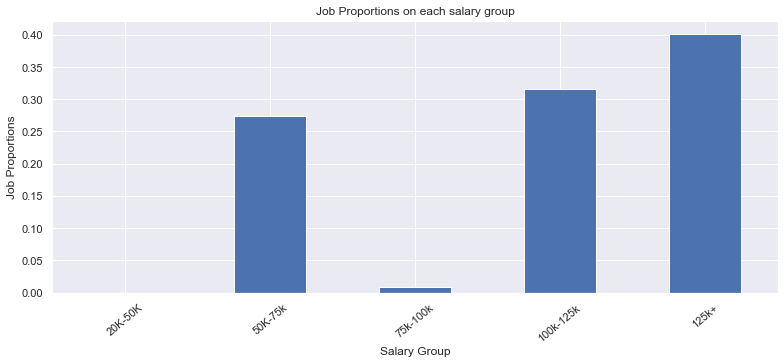

In [103]:
#plt.subplots(figsize=(13,5))
plt.figure(figsize=(13,5))
data.SalaryGroup.value_counts(sort=False, normalize=True).plot(kind='bar')
plt.xticks(rotation =40)
plt.xlabel('Salary Group')
plt.ylabel('Job Proportions')
plt.title('Job Proportions on each salary group')
plt.show()

### Step 3: Impute string variables

In [104]:
data.City.isnull().sum()

2

In [105]:
data.loc[data.State=='NY','City'].value_counts()

New York    19
Brooklyn     1
Name: City, dtype: int64

In [106]:
data.groupby('State')['City'].agg(lambda x: x.value_counts().index[0]).head()

State
CA    San Francisco
CO          Boulder
DC       Washington
DE       Wilmington
FL            Tampa
Name: City, dtype: object

In [107]:
# Impute City with most popular one in each State
data.City.fillna(data.groupby(['State'])['City'].transform(lambda x:x.value_counts().index[0]), inplace=True)

### Step 4: Deal with high CARDINALITY

In [108]:
data.CompanySizeGroup.unique()

array(['Extra-Large', 'Midsize', nan, 'Large', 'Small'], dtype=object)

In [109]:
data.CompanyRevenue.unique()

array(['$5B-$10B', nan, '>$10B', '$500M-$1B', '$1B-$5B', '$5M-$25M',
       '$25M-$100M'], dtype=object)

In [110]:
data.CompanyIndustry.unique()

array(['Financial Services', 'Healthcare', 'Telecommunications',
       'Rail Transportation', nan, 'Transportation & Logistics',
       'Government & Public Administration', 'Information Technology',
       'Insurance', 'Energy, Mining & Utilities', 'Manufacturing',
       'Department, Clothing & Shoe Stores',
       'Pharmaceutical & Biotechnology', 'Restaurants & Food Service',
       'Aerospace & Defense', 'Management & Consulting'], dtype=object)

In [111]:
#data.CompanySizeGroup.fillna('N/A', inplace =True) same as 
# Pd.get_dummies(df.CompanySizeGroup, drop_first=False)

How to deal with string variables with high CARDINALITY, such as 'job Title', and 'company', which can't be one-hot encoded????  Should them be dropped?  Will be depend on the model to be used. 


In [112]:
data.Company.unique()

array(['Discover', 'Radancy', 'AT&T', 'UnitedHealth Group',
       'Amazon.com Services LLC', 'SidekickHealth', 'CreateMe',
       'RutterKey Solutions, LLC', 'JPMorgan Chase Bank, N.A.', 'Trimac',
       'Health & Human Services Comm', 'NTT DATA Corporation', 'Citi',
       'FM Global', 'NATIONAL GRID CO USA (NE POWER)', 'Sphere Inc.',
       'Baker Hughes', 'Accenture', 'Enervee', 'XPO Logistics', 'Tonal',
       'Co-Star', 'Signature Performance', 'Fractal.ai',
       'Sarah Cannon Network', 'TechLabs', 'Gyfted', 'JVR Tech LLC',
       'Spotify', 'Syneos Health Clinical', 'Genentech', 'ACI Federal™',
       'MiQ Digital', 'Arlington County’s Department of Human Services',
       'Databricks', 'HK Tech', 'PatientKeeper', 'ASTHO',
       'Amazon Web Services, Inc.', 'Google', 'Datafugue', 'Passion',
       'Employa', 'Northrop Grumman', 'Capital One', 'Vtekh, Inc.',
       'Cigna', 'Loadsmart', 'SoundHound Inc.', 'United Airlines Inc.',
       'HotSchedules', 'STANDARD Pallets, INC.',

In [113]:
data.isnull().sum().sort_values(ascending=False)

SalaryMidValue        110
CompanyRevenue         67
CompanyIndustry        29
CompanySizeGroup       29
SalaryGroup             0
Region                  0
Company                 0
CompanyRating           0
isRemote                0
City                    0
State                   0
isJunior                0
isSenior                0
SalaryMidValue_imp      0
isMid                   0
isDA                    0
isDS                    0
isML                    0
isAI                    0
JobTitle                0
dtype: int64

### Step 5: Convert binary features to Int

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   JobTitle            117 non-null    object  
 1   Company             117 non-null    object  
 2   CompanyRating       117 non-null    float64 
 3   CompanyIndustry     88 non-null     object  
 4   isRemote            117 non-null    bool    
 5   City                117 non-null    object  
 6   State               117 non-null    object  
 7   Region              117 non-null    object  
 8   isSenior            117 non-null    bool    
 9   isJunior            117 non-null    bool    
 10  isMid               117 non-null    bool    
 11  SalaryMidValue      7 non-null      float64 
 12  CompanyRevenue      50 non-null     object  
 13  CompanySizeGroup    88 non-null     object  
 14  isDA                117 non-null    bool    
 15  isDS                117 non-null    bool

In [115]:
data.isRemote = data.isRemote.astype(int)

In [116]:
data.isSenior = data.isSenior.astype(int)

In [117]:
data.isJunior = data.isJunior.astype(int)

In [118]:
data.isMid = data.isMid.astype(int)

In [119]:
data.isDA = data.isDA.astype(int)

In [120]:
data.isDS = data.isDS.astype(int)

In [121]:
data.isML = data.isML.astype(int)

In [122]:
data.isAI = data.isAI.astype(int)

### Step 6: Plotting categorical data

In [123]:
#Reviewing summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CompanyRating,117.0,3.832479,0.248384,3.0,3.8,3.9,3.9,4.7
isRemote,117.0,0.196581,0.399122,0.0,0.0,0.0,0.0,1.0
isSenior,117.0,0.435897,0.498007,0.0,0.0,0.0,1.0,1.0
isJunior,117.0,0.017094,0.130179,0.0,0.0,0.0,0.0,1.0
isMid,117.0,0.008547,0.092450,0.0,0.0,0.0,0.0,1.0
SalaryMidValue,7.0,121506.700000,52868.945214,65000.0,75506.2,120000.0,161250.0,192034.5
isDA,117.0,0.239316,0.428501,0.0,0.0,0.0,0.0,1.0
isDS,117.0,0.230769,0.423137,0.0,0.0,0.0,0.0,1.0
isML,117.0,0.179487,0.385410,0.0,0.0,0.0,0.0,1.0
isAI,117.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


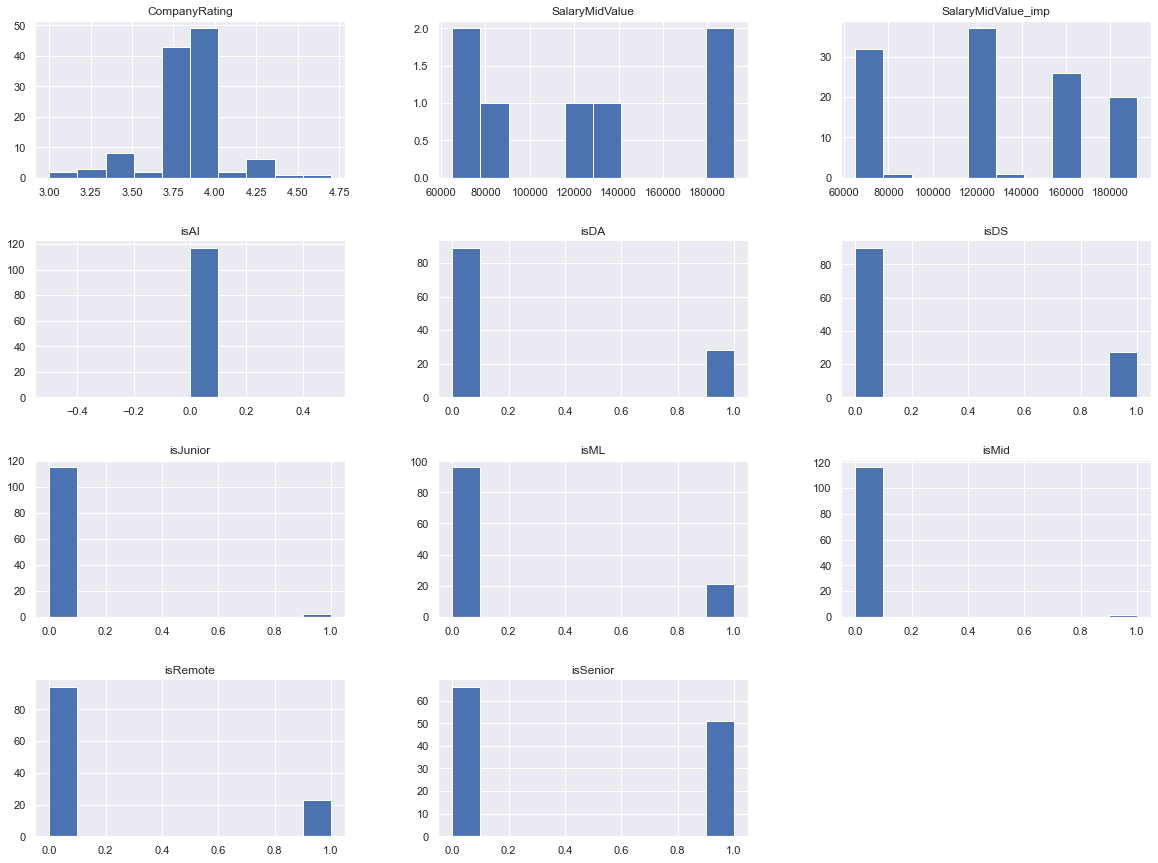

In [124]:
data.hist(bins=10,figsize=(20,15))
plt.subplots_adjust(hspace = .4)
plt.show()

In [125]:
#Revieing categorical data
data.select_dtypes(include=['object','float','int'], exclude=['datetime']).head(4)

,JobTitle,Company,CompanyRating,CompanyIndustry,isRemote,City,State,Region,isSenior,isJunior,isMid,SalaryMidValue,CompanyRevenue,CompanySizeGroup,isDA,isDS,isML,isAI,SalaryMidValue_imp
0,Senior Credit Bureau Data Analyst,Discover,3.9,Financial Services,0,Riverwoods,IL,Midwest,1,0,0,NaN,$5B-$10B,Extra-Large,1,0,0,0,185000.0
1,Product Data Analyst,Radancy,3.7,Healthcare,0,New York,NY,Northeast,0,0,0,NaN,NaN,Midsize,1,0,0,0,120000.0
2,Sr. Data Analyst,AT&T,3.7,Telecommunications,0,Atlanta,GA,South,1,0,0,NaN,>$10B,Extra-Large,1,0,0,0,69102.0
3,Principal Data Analyst - Digital - Telecommute,UnitedHealth Group,3.7,Healthcare,1,Dallas,TX,South,1,0,0,NaN,>$10B,Extra-Large,1,0,0,0,69102.0


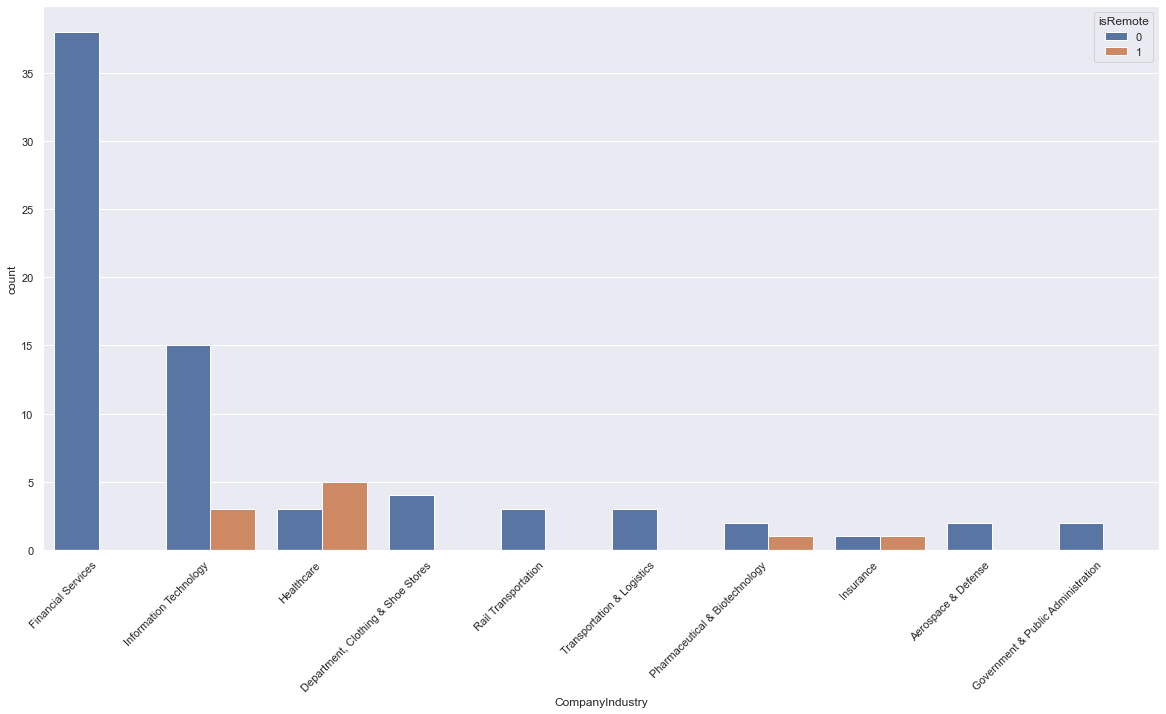

In [126]:
data_CI=data.groupby(['CompanyIndustry']).filter(lambda x:len(x)>data.shape[0]*.01)
plt.figure(figsize=(20,10))
sns.countplot(x='CompanyIndustry', hue='isRemote', data=data_CI, 
              order = data_CI.CompanyIndustry.value_counts().index)
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

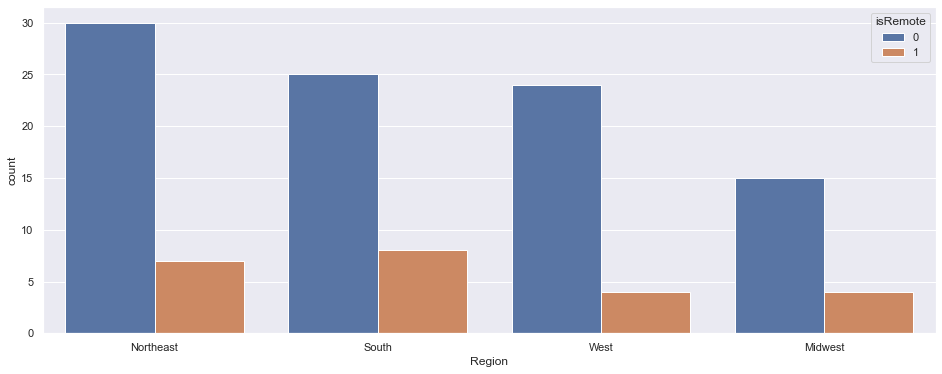

In [127]:
plt.figure(figsize =(16,6))
sns.countplot(x='Region', data= data, hue='isRemote', order = 
              data.Region.value_counts().index)
plt.show()

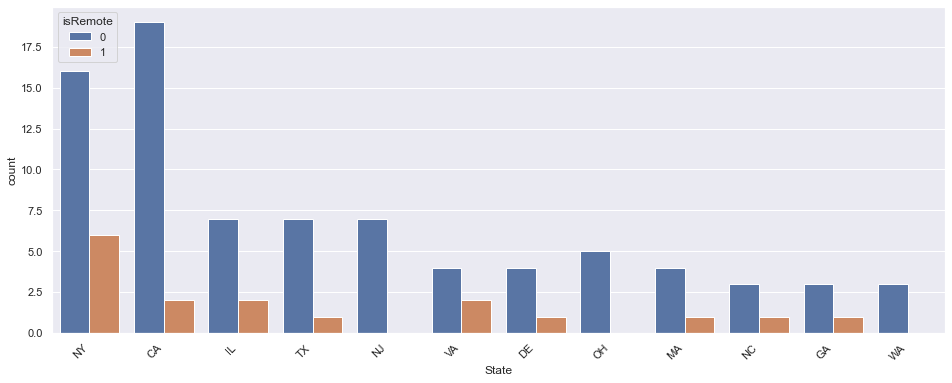

In [128]:
plt.figure(figsize=(16, 6))
data_State = data.groupby('State').filter(lambda x:len(x)>data.shape[0]*.02)
plot = sns.countplot(x='State', hue='isRemote',data = data_State,
             order = data_State.State.value_counts().index)
plt.xticks(rotation=45,horizontalalignment='right')
#plot.legend(loc='upper right')
plt.tight_layout
plt.show()

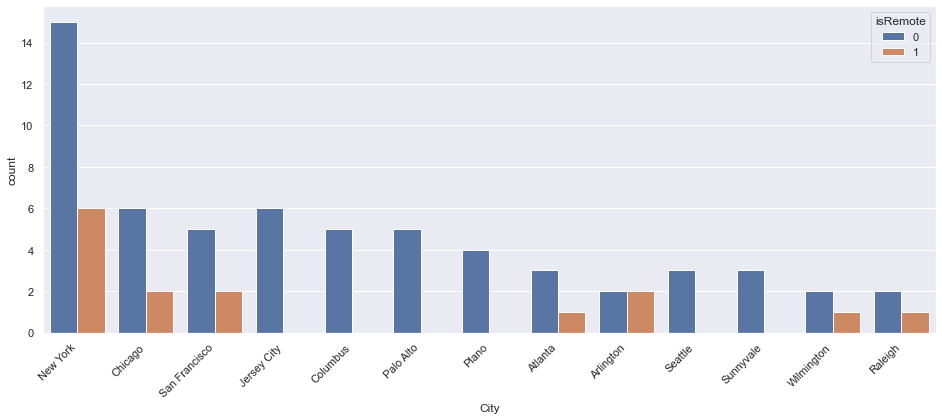

In [129]:
data_City = data.groupby('City').filter(lambda x: len(x)>(data.shape[0]*.02))
plt.figure(figsize=(16, 6))
sns.countplot(x='City', data = data_City, hue='isRemote', 
             order = data_City.City.value_counts().index)
plt.xticks(rotation=45,horizontalalignment='right')
#plt.legend(loc='upper right')
plt.show()
#That makes sense 

Analyze company, rating, location:
1: group by company to see who is the largest hiree



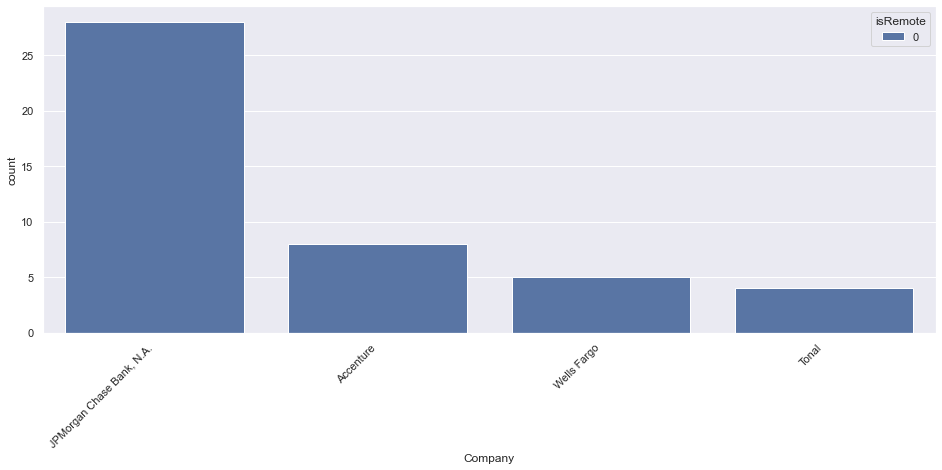

In [130]:
data_Company = data.groupby('Company').filter(lambda x:len(x)>3)
plt.figure(figsize=(16, 6))
sns.countplot(x='Company', data = data_Company, hue='isRemote',
             order = data_Company.Company.value_counts().index)
plt.xticks(rotation =45, horizontalalignment ='right')
plt.show()

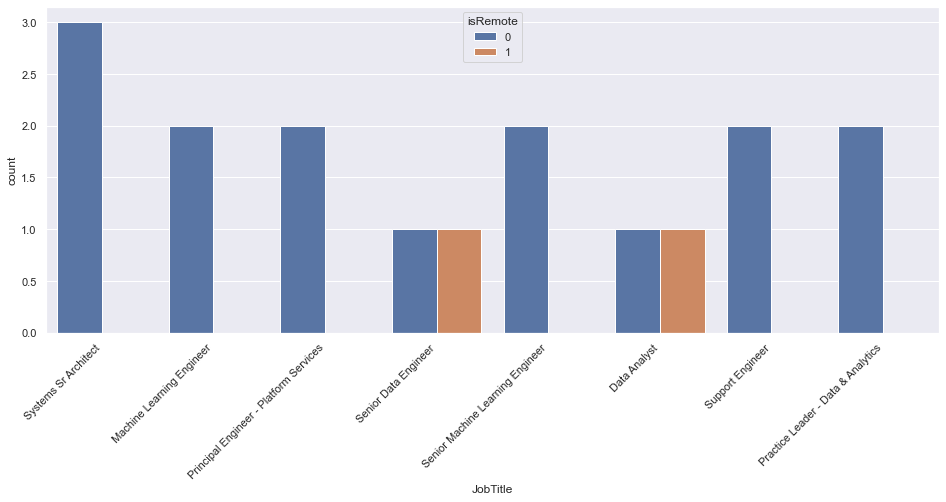

In [131]:
plt.figure(figsize=(16, 6))
data_Title = data.groupby('JobTitle').filter(lambda x:len(x)>1)
sns.countplot(x='JobTitle', data =data_Title, hue='isRemote',
             order = data_Title.JobTitle.value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

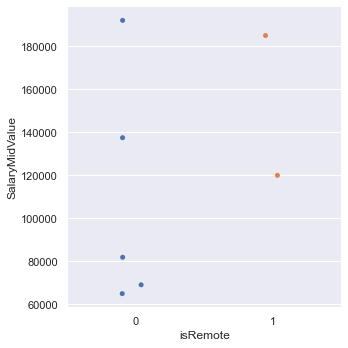

In [132]:
sns.catplot(x='isRemote', y='SalaryMidValue', data=data)
plt.show()

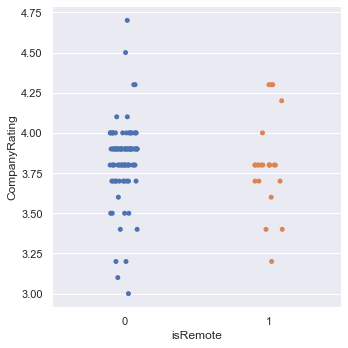

In [133]:
sns.catplot(x='isRemote', y='CompanyRating', data=data)
plt.show()

<Figure size 1152x432 with 0 Axes>

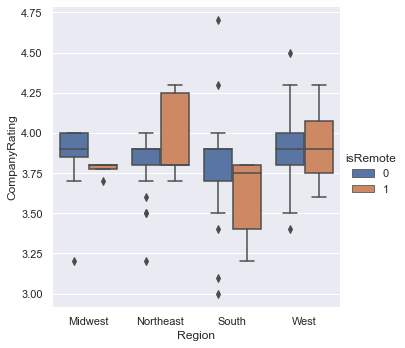

In [134]:
plt.figure(figsize=(16, 6))
sns.catplot(x='Region',y='CompanyRating', data=data, kind='box', hue='isRemote')
plt.show()

<Figure size 1152x432 with 0 Axes>

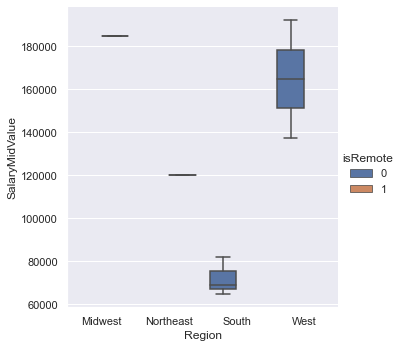

In [135]:
plt.figure(figsize=(16, 6))
sns.catplot(x='Region', y='SalaryMidValue',data=data, kind='box', hue='isRemote')
plt.show()

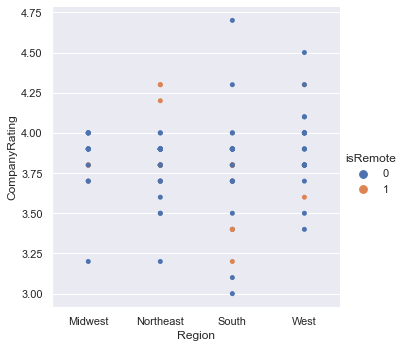

In [136]:
sns.catplot(x='Region',y='CompanyRating', data=data,jitter=False , hue='isRemote')
plt.show()
# Indicating that most of remote jobs don't have company location information associated with 
# and with all kinds of CompanyRating values

<Figure size 720x1440 with 0 Axes>

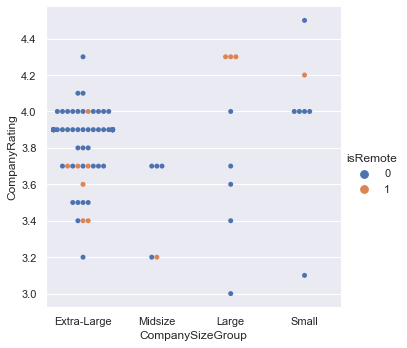

In [137]:
plt.figure(figsize=(10,20))

sns.catplot(x='CompanySizeGroup',y='CompanyRating', data=data, kind='swarm', hue='isRemote' )
plt.show()

# it seems remote jobs spread out to different size of companies equaly

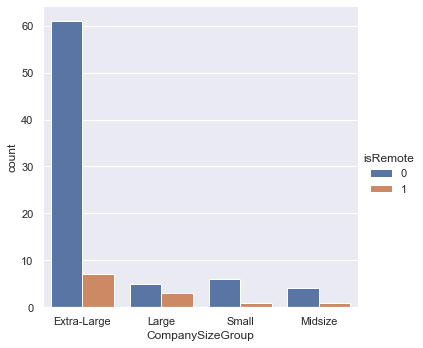

In [138]:
sns.catplot(x='CompanySizeGroup', data=data, kind='count', hue='isRemote',
           order = data.CompanySizeGroup.value_counts().index)
plt.show()

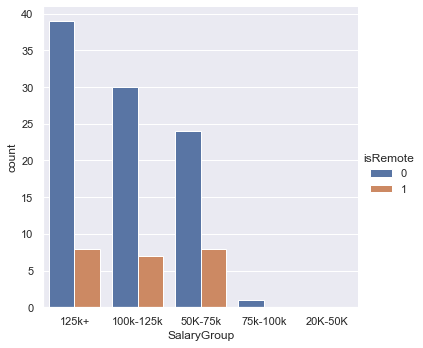

In [139]:
sns.catplot(x='SalaryGroup', data=data, kind='count', hue='isRemote',
           order = data.SalaryGroup.value_counts().index)
plt.show()
# Indicating which salary group have most remote jobs

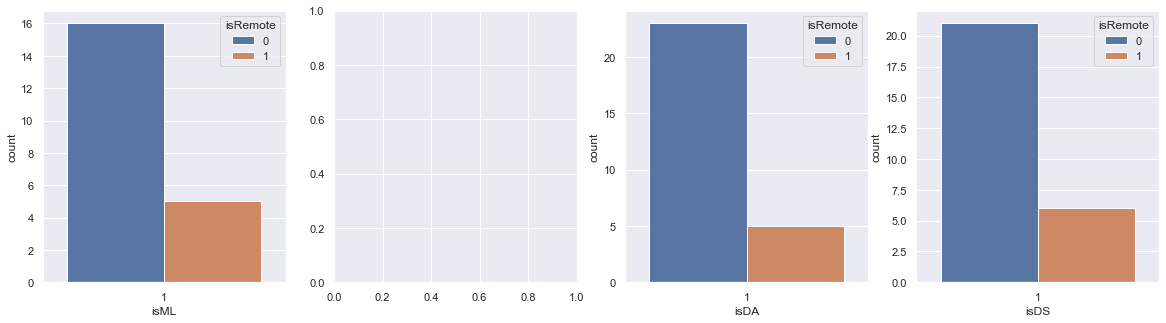

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(x='isML',data=data.loc[data.isML==1,:],hue='isRemote')
plt.subplot(1,4,2)
#sns.countplot(x='isAI',data=data.loc[data.isAI==1,:],hue='isRemote')
plt.subplot(1,4,3)
sns.countplot(x='isDA',data=data.loc[data.isDA==1,:],hue='isRemote')
plt.subplot(1,4,4)
sns.countplot(x='isDS',data=data.loc[data.isDS==1,:],hue='isRemote')
plt.show()
#Trying to put all 4 variables into one plot

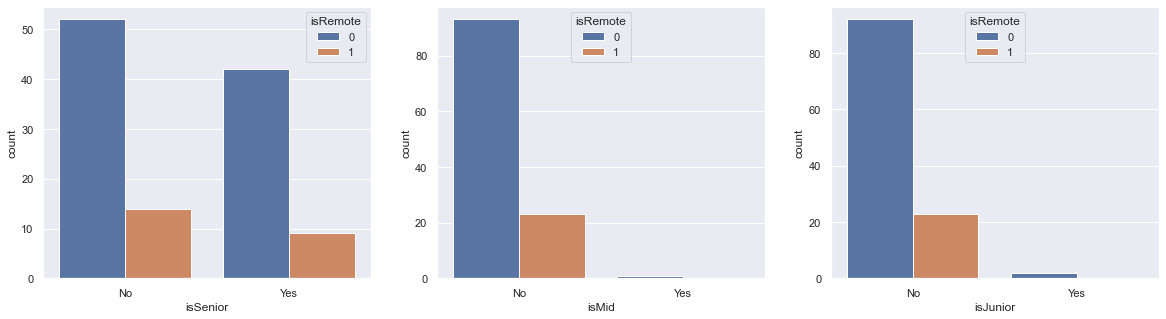

In [141]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='isSenior', data=data, hue='isRemote')
plt.xticks([0,1],['No','Yes'])
plt.subplot(1,3,2)
sns.countplot(x='isMid', data=data, hue='isRemote')
plt.xticks([0,1],['No','Yes'])
plt.subplot(1,3,3)
sns.countplot(x='isJunior', data=data, hue='isRemote')
plt.xticks([0,1],['No','Yes'])
plt.show()

### Step 7: Visualize relationship between variables and Pandas profiling

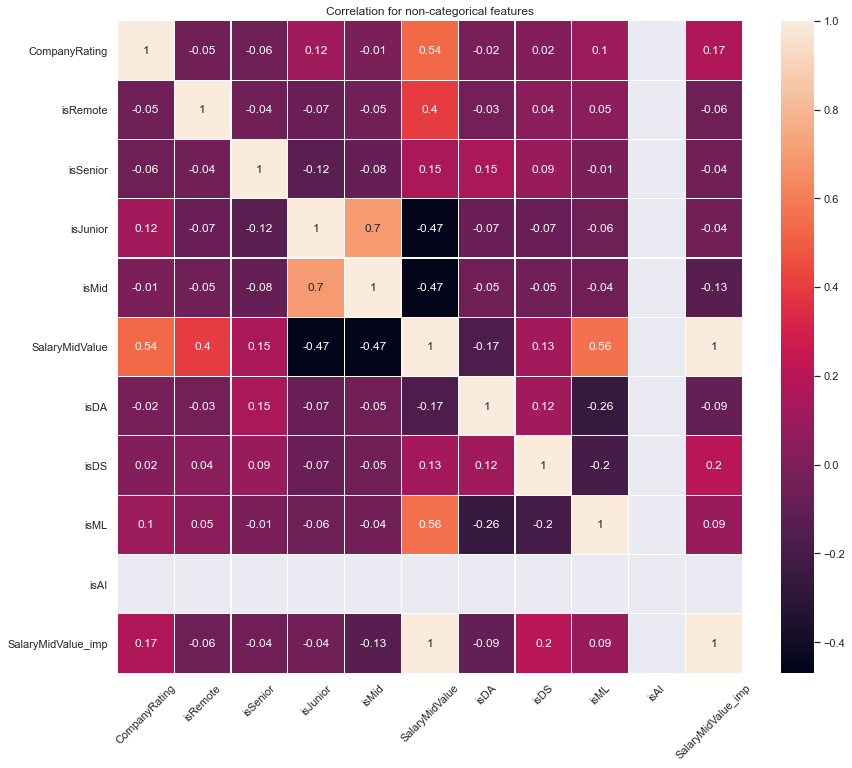

In [142]:
#create the correlation matrix heat map
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(round(data.corr(),2), annot=True, ax=ax, linewidths=.1)
plt.xticks(rotation =45)
plt.title('Correlation for non-categorical features')
plt.show()

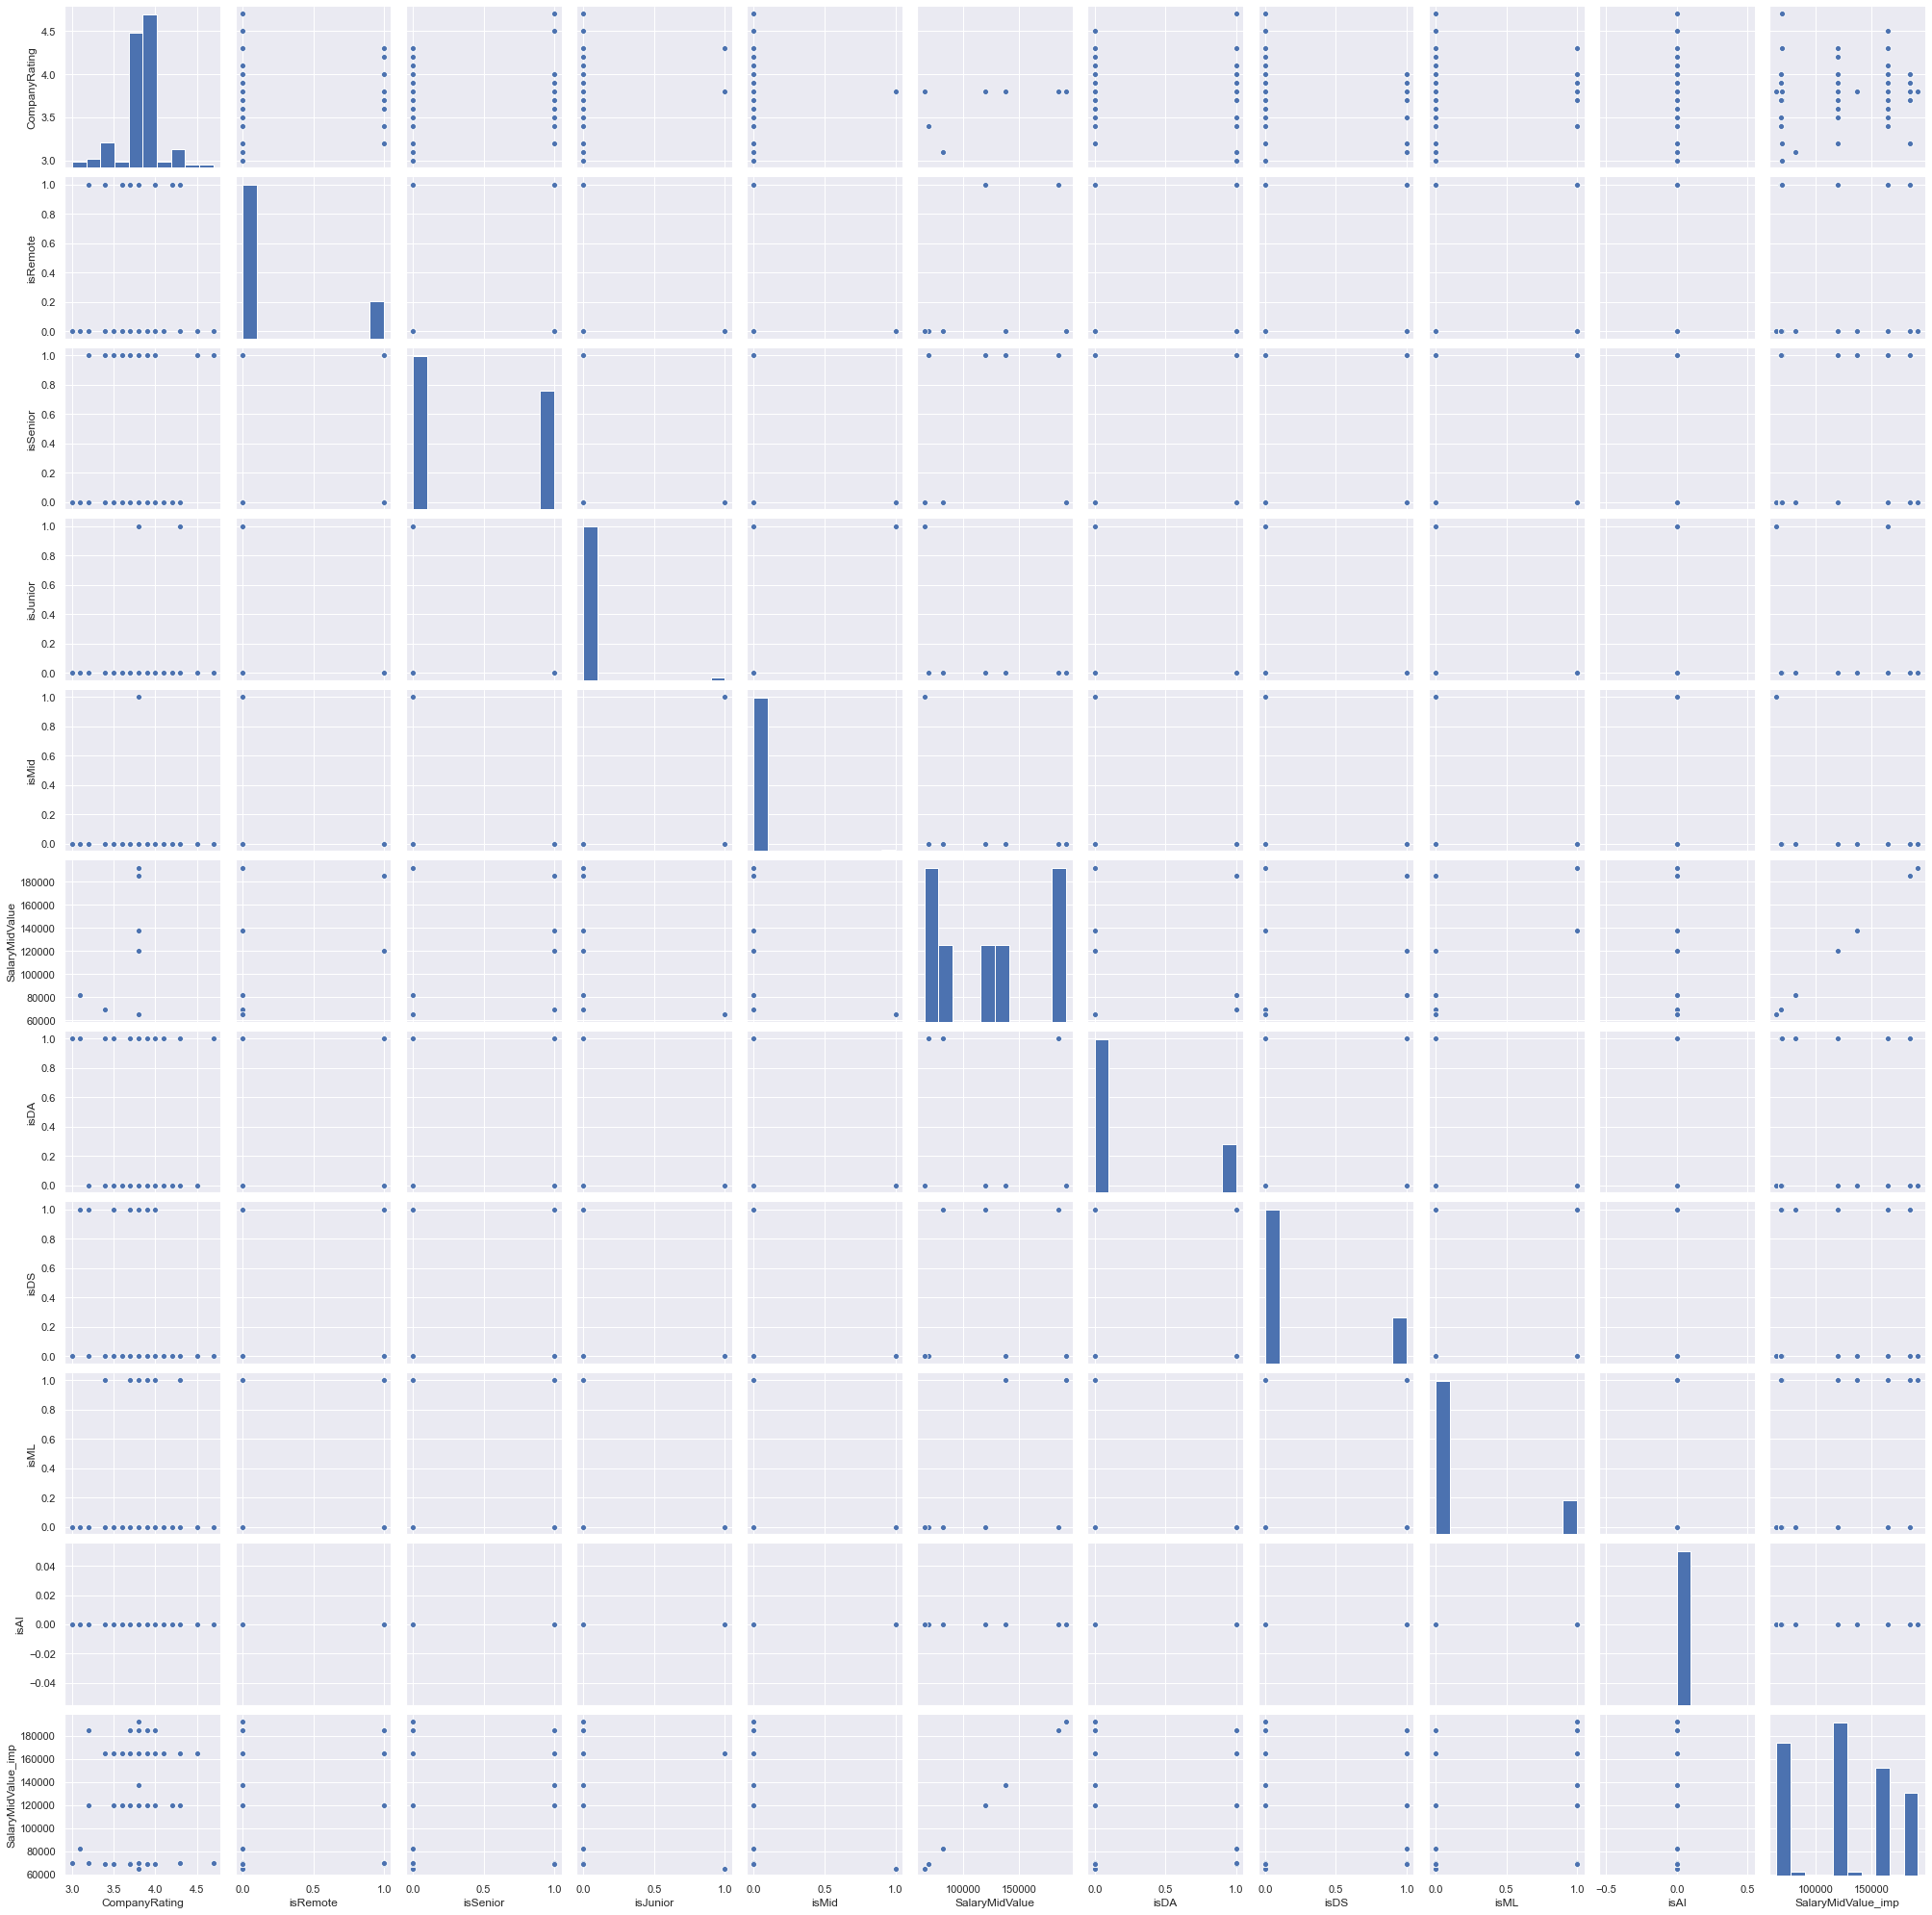

In [143]:
sns.pairplot(data)

In [144]:
%load_ext autoreload
%autoreload 2

In [145]:
# uncomment and run below if you need to pip install the pandas-profiling library
#import sys
#!{sys.executable} -m pip install -U pandas-profiling==2.9.0
#!jupyter nbextension enable --py widgetsnbextension

In [146]:
from pathlib import Path

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [147]:
report = data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [148]:
profile_report = data.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("../reports/pandas_profiling/{0}_daily.html".format(today))

### Step 7: Feature Selection and Enginering

There is no high variable correlations such as 0.98, therefore no risk of violating co-linearity rules, which would limit us to use only certain modeling technique such as Random Forest or decision tree. 

How to deal with features with high correlation, such as 'Region', 'State', and 'City' variables with 'Remote' & United States' value with 'isRemote' variable??? Should they be dropped?  for ex:
* Value	Count	Frequency (%)	 
*     Redmond, WA	189	8.7%	 
* New York, NY	95	4.4%	 
*        Remote	89	4.1%	 
* United States	89	4.1%	

If includes them, wheather limit to model selection only to Random Forest?drop or remove those records?

* Solve this issue at stage 2, random impute on 'Location' feature for 'Remote' and 'United States' before extract 'Region', 'State', and 'City' features from 'Location'.  That only leaves small percentage of missing value on 'City', which can be handle with get_dummies: dummy_na, or as it is handled here in step 3.

### Step 9: Save 

In [149]:
# save the data as a new csv file
datapath = '../data/processed/'
fileName = '{0}_daily_p.csv'.format(today)
save_file(data, fileName, datapath)

Writing file.  "../data/processed/2021_06_01_daily_p.csv"
